# Purpose of notebook: do KeyNMF (static + dynamic)

In [3]:
# import/load packages

## install
%pip install pandas as pd
%pip install chardet
#%pip install cchardet
%pip install turftopic
%pip install sentence-transformers[onnx, onnx-gpu]
%pip install tqdm
%pip install spacy
%pip install plotly
%pip install plotly.express

## import
import os
import pandas as pd
import chardet
#import cchardet
import re
from bs4 import BeautifulSoup
import turftopic
from turftopic import KeyNMF
from tqdm import tqdm
import spacy
import plotly
from datetime import datetime
import plotly.express as px



ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Invalid requirement: 'sentence-transformers[onnx,': Expected extra name after comma
    sentence-transformers[onnx,
                               ^
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# STATIC TOPIC MODELING

## Trying on CNN_Fox_joined_17_05 - smaller dataset

In [7]:
# read csv
file_path = "/work/Bachelor/sample_data/dropbox/joined_dataframe/CNN_Fox_joined_17_05.csv"
CNN_Fox_joined_17_05 = pd.read_csv(file_path)

# removing the words coded as censored
CNN_Fox_joined_17_05["body"] = CNN_Fox_joined_17_05["body"].str.replace("CENSOREDfrfrfr", "", regex=False)

# make articles into lists 
corpus = CNN_Fox_joined_17_05["body"].tolist()

# inspect data
#corpus

# check data type
#type(corpus)

# check length
len(corpus)

145

In [3]:
# KeyNMF - see general topics
model = KeyNMF(10).fit(corpus)
model.print_topics()

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Output()

[13:48:46] Keyword extraction done.                                                                   ]8;id=459152;file:///opt/conda/lib/python3.10/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=398915;file:///opt/conda/lib/python3.10/site-packages/turftopic/models/keynmf.py#178\178]8;;\

           Model fitting done.                                                                        ]8;id=4013;file:///opt/conda/lib/python3.10/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=359487;file:///opt/conda/lib/python3.10/site-packages/turftopic/models/keynmf.py#185\185]8;;\

┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Topic ID ┃ Highest Ranking                                                                                      ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        0 │ comey, fbi, rosenstein, trump, investigation, president, clinton, department, attorney, deputy       │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        1 │ republican, republicans, senate, congressional, trump, democrats, president, obama, vote, plan       │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        2 │ trump, russian, president, russia, donald, information, news, russians, officials, ambassador        │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        3 │ clinton, hillary, trump, presidential, donald, election, presidency, cnn, president, 2016            │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        4 │ justice, police, court, charges, attorney, murder, criminal, arrested, law, case                     │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        5 │ voters, political, election, vote, votes, victory, french, candidate, campaign, president            │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        6 │ mother, old, cnn, woman, story, happening, facebook, cut, family, women                              │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        7 │ isis, muslim, trump, attack, terrorism, president, threat, security, military, killed                │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        8 │ investigation, fbi, investigations, collusion, cnn, congress, rosenstein, meddling, senate, campaign │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        9 │ news, fox, incident, said, reporter, reportedly, united, media, told, trump                          │
└──────────┴──────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [4]:
# KeyNMF - see topic proportions for individual articles

# initiate model
model = KeyNMF(n_components=10)

# make a document topic matrix (this is a NumPy matrix of shape (n_documents, n_topics))
document_topic_matrix = model.fit_transform(corpus)

# make dataframe with topic proportions for each article
topic_features_df = pd.DataFrame(document_topic_matrix, columns=model.topic_names)

# add textID as the first column
topic_features_df.insert(0, 'textID', CNN_Fox_joined_17_05['textID'].values)

# add source as the second column
topic_features_df.insert(1, 'source', CNN_Fox_joined_17_05['source'].values)

# view dataframe
topic_features_df

Output()

[13:48:54] Keyword extraction done.                                                                   ]8;id=251716;file:///opt/conda/lib/python3.10/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=259879;file:///opt/conda/lib/python3.10/site-packages/turftopic/models/keynmf.py#178\178]8;;\

           Model fitting done.                                                                        ]8;id=59583;file:///opt/conda/lib/python3.10/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=990773;file:///opt/conda/lib/python3.10/site-packages/turftopic/models/keynmf.py#185\185]8;;\

,textID,source,0_comey_fbi_rosenstein_trump,1_republican_republicans_senate_congressional,2_trump_russian_president_russia,3_clinton_hillary_trump_presidential,4_justice_police_court_attorney,5_voters_political_election_vote,6_mother_old_cnn_woman,7_isis_muslim_trump_attack,8_investigation_fbi_investigations_collusion,9_news_fox_incident_said
0,18209128,CNN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051784,0.259463,0.015050,0.000000
1,18216117,CNN,0.000000,0.718599,0.000000,0.000000,0.000000,0.037255,0.000000,0.000000,0.000000,0.000000
2,18229187,CNN,0.000000,0.535653,0.066775,0.000000,0.000000,0.150818,0.033271,0.006932,0.000000,0.000000
3,18232148,CNN,0.000000,0.000000,0.000000,0.000487,0.007192,0.003474,0.076738,0.008113,0.007018,0.006639
4,18232776,CNN,0.005116,0.000000,0.022351,0.523514,0.000000,0.138590,0.000000,0.000000,0.038148,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
140,18700902,Fox News,0.027390,0.065933,0.067314,0.000000,0.000000,0.003599,0.000000,0.051983,0.000000,0.155710
141,18702549,Fox News,0.000000,0.000000,0.000000,0.000000,0.000000,0.011685,0.065334,0.042437,0.000000,0.022023
142,18709258,Fox News,0.000000,0.000000,0.000000,0.582326,0.000000,0.008228,0.006665,0.020750,0.000000,0.000000
143,18711656,Fox News,0.039061,0.000000,0.233370,0.000000,0.035018,0.017661,0.000000,0.000000,0.191309,0.007800


### Subsetting
### CNN

In [6]:
# only include CNN

# read csv
file_path = "/work/Bachelor/sample_data/dropbox/joined_dataframe/CNN_Fox_joined_17_05.csv"
CNN_Fox_joined_17_05 = pd.read_csv(file_path)

# Filter the DataFrame to include only rows where 'source' is 'CNN'
CNN_only_df = CNN_Fox_joined_17_05[CNN_Fox_joined_17_05["source"] == "CNN"]

# removing the words coded as censored
CNN_only_df["body"] = CNN_only_df["body"].str.replace("CENSOREDfrfrfr", "", regex=False)

# make articles into lists 
corpus = CNN_only_df["body"].tolist()

# inspect data
#corpus

# check data type
#type(corpus)

# check length
len(corpus)


/tmp/ipykernel_6766/707651472.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CNN_only_df["body"] = CNN_only_df["body"].str.replace("CENSOREDfrfrfr", "", regex=False)


74

In [7]:
# KeyNMF - see general topics for CNN
model = KeyNMF(10).fit(corpus)
model.print_topics()

Output()

[14:02:26] Keyword extraction done.                                                                   ]8;id=5162;file:///opt/conda/lib/python3.10/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=679560;file:///opt/conda/lib/python3.10/site-packages/turftopic/models/keynmf.py#178\178]8;;\

           Model fitting done.                                                                        ]8;id=670194;file:///opt/conda/lib/python3.10/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=261575;file:///opt/conda/lib/python3.10/site-packages/turftopic/models/keynmf.py#185\185]8;;\

┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Topic ID ┃ Highest Ranking                                                                                      ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        0 │ fbi, investigation, comey, firing, trump, department, cnn, congress, attorney, senate                │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        1 │ congressional, republican, republicans, senate, democrats, votes, vote, trump, president, committee  │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        2 │ obama, president, trump, presidency, cnn, donald, washington, democrats, republicans, administration │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        3 │ clinton, hillary, election, presidential, comey, 2016, fbi, campaign, russian, trump                 │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        4 │ justice, court, police, case, attorney, charges, law, said, reporters, security                      │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        5 │ mother, woman, family, story, women, case, happening, old, father, care                              │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        6 │ cnn, city, place, world, area, seen, washington, happening, facebook, house                          │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        7 │ election, political, vote, votes, victory, minister, presidential, democratic, campaign, president   │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        8 │ trump, donald, news, russian, cnn, information, russia, president, officials, media                  │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        9 │ senior, president, old, secretary, years, year, 2017, 2016, decades, director                        │
└──────────┴──────────────────────────────────────────────────────────────────────────────────────────────────────┘

### Fox News

In [9]:
# only include Fox News

# read csv
file_path = "/work/Bachelor/sample_data/dropbox/joined_dataframe/CNN_Fox_joined_17_05.csv"
CNN_Fox_joined_17_05 = pd.read_csv(file_path)

# Filter the DataFrame to include only rows where 'source' is 'CNN'
Fox_only_df = CNN_Fox_joined_17_05[CNN_Fox_joined_17_05["source"] == "Fox News"]

# removing the words coded as censored
Fox_only_df["body"] = Fox_only_df["body"].str.replace("CENSOREDfrfrfr", "", regex=False)

# make articles into lists 
corpus = Fox_only_df["body"].tolist()

# inspect data
#corpus

# check data type
#type(corpus)

# check length
len(corpus)


/tmp/ipykernel_6766/1933235215.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fox_only_df["body"] = Fox_only_df["body"].str.replace("CENSOREDfrfrfr", "", regex=False)


71

In [10]:
# KeyNMF - see general topics for Fox News
model = KeyNMF(10).fit(corpus)
model.print_topics()

Output()

[14:02:54] Keyword extraction done.                                                                   ]8;id=713745;file:///opt/conda/lib/python3.10/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=10707;file:///opt/conda/lib/python3.10/site-packages/turftopic/models/keynmf.py#178\178]8;;\

/opt/conda/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of 
iterations 200 reached. Increase it to improve convergence.
  warnings.warn(

           Model fitting done.                                                                        ]8;id=283630;file:///opt/conda/lib/python3.10/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=402157;file:///opt/conda/lib/python3.10/site-packages/turftopic/models/keynmf.py#185\185]8;;\

┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Topic ID ┃ Highest Ranking                                                                                    ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        0 │ fbi, attorney, department, president, trump, director, general, james, presidential, case          │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        1 │ incident, police, said, statement, attack, spokesman, public, united, time, just                   │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        2 │ trump, president, administration, government, washington, adviser, going, news, foreign, said      │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        3 │ russian, russia, presidential, security, reports, information, trump, officials, reported, meeting │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        4 │ fox, news, said, told, reportedly, report, 22, tuesday, new, just                                  │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        5 │ investigation, fbi, white, news, media, reports, administration, law, official, russian            │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        6 │ news, officials, public, police, information, report, york, security, media, department            │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        7 │ attack, reportedly, killed, military, people, friday, reported, 10, said, nation                   │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        8 │ congress, republican, trump, president, said, make, america, end, law, left                        │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        9 │ media, house, day, state, republican, just, called, said, way, years                               │
└──────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

### the hell is this working.. :o

## Trying on joined_17_05 - larger dataset

In [5]:
# read csv
file_path = "/work/Bachelor/sample_data/dropbox/joined_dataframe/joined_17_05.csv"
joined_17_05 = pd.read_csv(file_path)

# removing the words coded as censored
joined_17_05["body"] = joined_17_05["body"].str.replace("CENSOREDfrfrfr", "", regex=False)

# make articles into lists 
corpus = joined_17_05["body"].tolist()

# inspect data
#corpus

# check data type
#type(corpus)

# check length
len(corpus)

26663

In [6]:
# KeyNMF - see general topics
model = KeyNMF(10).fit(corpus)
model.print_topics()

Output()

[13:56:36] Keyword extraction done.                                                                   ]8;id=558995;file:///opt/conda/lib/python3.10/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=419409;file:///opt/conda/lib/python3.10/site-packages/turftopic/models/keynmf.py#178\178]8;;\

[13:56:40] Model fitting done.                                                                        ]8;id=248563;file:///opt/conda/lib/python3.10/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=37496;file:///opt/conda/lib/python3.10/site-packages/turftopic/models/keynmf.py#185\185]8;;\

┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Topic ID ┃ Highest Ranking                                                                                      ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        0 │ court, accused, judge, charges, prosecutors, convicted, arrested, prison, jail, murder               │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        1 │ trump, president, fbi, donald, investigation, comey, presidential, flynn, clinton, fired             │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        2 │ stock, market, shares, investors, earnings, analysts, investment, nasdaq, company, nyse              │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        3 │ inning, innings, baseball, pitch, pitcher, pitching, pitches, hitter, baseman, bullpen               │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        4 │ students, student, school, college, university, schools, campus, education, teacher, teachers        │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        5 │ police, suspect, shooting, officers, incident, arrested, shot, officer, arrest, killed               │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        6 │ nba, celtics, cavaliers, lebron, finals, warriors, playoffs, playoff, cavs, cleveland                │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        7 │ republicans, obamacare, republican, democrats, congressional, election, senate, gop, congress,       │
│          │ medicaid                                                                                             │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        8 │ weather, rain, storms, winds, thunderstorms, storm, afternoon, forecast, day, temperatures           │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        9 │ news, subscription, newspaper, unlimited, free, sunday, digital, access, subscribers, replica        │
└──────────┴──────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [7]:
# KeyNMF - see topic proportions for individual articles

# initiate model
model = KeyNMF(n_components=10)

# make a document topic matrix (this is a NumPy matrix of shape (n_documents, n_topics))
document_topic_matrix = model.fit_transform(corpus)

# make dataframe with topic proportions for each article
topic_features_df = pd.DataFrame(document_topic_matrix, columns=model.topic_names)

# add textID as the first column
topic_features_df.insert(0, 'textID', joined_17_05['textID'].values)

# add source as the second column
topic_features_df.insert(1, 'source', joined_17_05['source'].values)

# view dataframe
topic_features_df

Output()

[14:20:15] Keyword extraction done.                                                                   ]8;id=617204;file:///opt/conda/lib/python3.10/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=973229;file:///opt/conda/lib/python3.10/site-packages/turftopic/models/keynmf.py#178\178]8;;\

[14:20:19] Model fitting done.                                                                        ]8;id=274281;file:///opt/conda/lib/python3.10/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=695252;file:///opt/conda/lib/python3.10/site-packages/turftopic/models/keynmf.py#185\185]8;;\

,textID,source,0_court_accused_judge_charges,1_trump_president_fbi_donald,2_stock_market_shares_investors,3_inning_innings_baseball_pitch,4_students_student_school_college,5_police_suspect_shooting_officers,6_nba_celtics_cavaliers_lebron,7_republicans_obamacare_republican_democrats,8_weather_rain_storms_winds,9_news_subscription_newspaper_unlimited
0,18207168,Huffington Post,0.002518,0.000000,0.000000,0.000000,0.015067,0.004430,0.000000,0.000214,0.000584,0.004224
1,18207169,GoLocalProv,0.000019,0.000000,0.017705,0.000000,0.005113,0.000000,0.000000,0.029184,0.000393,0.001427
2,18207170,Engadget,0.000198,0.000000,0.001744,0.000000,0.001090,0.000293,0.000108,0.003579,0.001267,0.000944
3,18207172,Northwest Herald,0.001279,0.000000,0.000145,0.000508,0.042063,0.001489,0.001752,0.000000,0.003597,0.002473
4,18207174,GoLocalProv,0.000000,0.000000,0.000000,0.000022,0.004733,0.005283,0.000948,0.017291,0.008412,0.002157
...,...,...,...,...,...,...,...,...,...,...,...,...
26658,18745486,OCRegister,0.000922,0.000082,0.000000,0.000092,0.001312,0.001493,0.000710,0.000001,0.000771,0.001580
26659,18745488,fox4kc.com,0.008368,0.000000,0.000000,0.000000,0.006378,0.016021,0.000880,0.000295,0.005502,0.003133
26660,18745489,FOX 5 Atlanta,0.005059,0.000000,0.000061,0.000436,0.004782,0.003636,0.003747,0.007464,0.008683,0.003813
26661,18745490,Q13 FOX,0.103999,0.000000,0.000000,0.002099,0.000000,0.031758,0.005454,0.000000,0.000055,0.000000


## Prep before running KeyNMF
### - evt lemmatize 👩‍🍳 - complex
### - evt have it make x topics that it deems makes sense 👩‍🍳 - not sure if KeyNMF can do it
### - remove words called 'CENSORED' from 'body' ✔️
### - add textIDs in the first column ✔️

# DYNAMIC TOPIC MODELING

## Trying on CNN_Fox_joined_17_05 - smaller dataset

In [28]:
# read csv
file_path = "/work/Bachelor/sample_data/dropbox/joined_dataframe/CNN_Fox_joined_17_05.csv"
CNN_Fox_joined_17_05 = pd.read_csv(file_path)

# removing the words coded as censored
CNN_Fox_joined_17_05["body"] = CNN_Fox_joined_17_05["body"].str.replace("CENSOREDfrfrfr", "", regex=False)

# make articles into lists
corpus = CNN_Fox_joined_17_05["body"].tolist()

# convert timestamps to datetime objects
CNN_Fox_joined_17_05["date"] = pd.to_datetime(CNN_Fox_joined_17_05["date"], format = "%y-%m-%d")

# make timestamps (now datetime objects) into lists
timestamps = CNN_Fox_joined_17_05["date"].tolist()

# inspect data
#corpus

# check data type
#type(corpus)

# check length
len(corpus)

145

In [43]:
# initiate dynamic model
model = KeyNMF(5, top_n=6, random_state=42) # top_n must be larger than the first number to run
document_topic_matrix = model.fit_transform_dynamic(
    corpus, timestamps=timestamps, bins=10
)


In [40]:
# see topics and their keywords over time 
model.print_topics_over_time()

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Time Slice       ┃ 0_fbi_comey_inv… ┃ 1_trump_clinton… ┃ 2_republican_re… ┃ 3_news_investig… ┃ 4_isis_muslim_a… ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ 2017 05 01 -     │ fbi, comey,      │ trump, hillary,  │ senate,          │ criminal,        │ isis, terrorism, │
│ 2017 05 04       │ clinton,         │ clinton,         │ congressional,   │ justice,         │ cnn, view, west  │
│                  │ investigation,   │ president,       │ republicans,     │ arrested,        │                  │
│                  │ cnn              │ campaign         │ vote, republican │ incident, police │                  │
├──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┤
│ 2017 05 04 -     │ cnn, washington, │ political,       │ democrats,       │ media, fox,      │ alleged, war,    │
│ 2017 05 07       │ care, health,    │ trump, victory,  │ congressional,   │ news, lives,     │ thousands, area, │
│                  │ happening        │ party, minister  │ republicans,     │ house            │ hundreds         │
│                  │                  │                  │ republican,      │                  │                  │
│                  │                  │                  │ voters           │                  │                  │
├──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┤
│ 2017 05 07 -     │ comey, fbi,      │ trump,           │ voters,          │ collusion,       │ muslim, court,   │
│ 2017 05 10       │ rosenstein,      │ presidential,    │ election,        │ medical,         │ minister,        │
│                  │ investigation,   │ presidency,      │ french, votes,   │ investigation,   │ controversial,   │
│                  │ clinton          │ donald, voters   │ democratic       │ health, andrew   │ obama            │
├──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┤
│ 2017 05 10 -     │ fbi, comey,      │ trump, clinton,  │ obama,           │ flight, russian, │ isis, terrorism, │
│ 2017 05 13       │ investigation,   │ hillary,         │ republicans,     │ russians,        │ democratic,      │
│                  │ rosenstein,      │ candidate, comey │ democrats, cnn,  │ russia, united   │ concerns,        │
│                  │ firing           │                  │ republican       │                  │ military         │
├──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┤
│ 2017 05 13 -     │ fbi,             │ trump,           │ rosenstein,      │ news, cnn,       │ isis, muslim,    │
│ 2017 05 16       │ investigation,   │ president,       │ presidential,    │ police, donald,  │ president,       │
│                  │ fox, federal,    │ donald, cnn,     │ senate, comey,   │ intelligence     │ leaders,         │
│                  │ clinton          │ intelligence     │ trump            │                  │ leadership       │
├──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┤
│ 2017 05 16 -     │ fbi,             │ trump, clinton,  │ rosenstein,      │ news, russian,   │ isis, fight,     │
│ 2017 05 19       │ investigation,   │ president,       │ senate,          │ russia,          │ incident,        │
│                  │ comey,           │ donald, tweet    │ collusion,       │ conversations,   │ terrorism,       │
│                  │ investigations,  │                  │ investigations,  │ fox              │ attack           │
│                  │ rosenstein       │                  │ investigation    │                  │                  │
├──────────────────┼──────────────────┼─────────────────

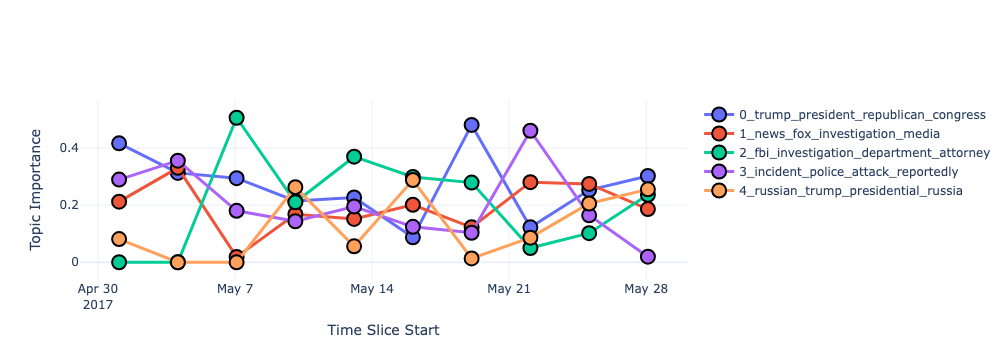

In [67]:
# plot development of topic importance over time
dynamic_plot = model.plot_topics_over_time(top_k=5)
dynamic_plot

In [68]:
# save plot as an html file
save_dir = "plots/topic_modeling/" # specify where to save it
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, "dynamic_plot.html")

dynamic.write_html(save_path)

## It works<33

## Now subsetting

### CNN

In [44]:
# only include CNN

# read csv
file_path = "/work/Bachelor/sample_data/dropbox/joined_dataframe/CNN_Fox_joined_17_05.csv"
CNN_Fox_joined_17_05 = pd.read_csv(file_path)

# Filter the DataFrame to include only rows where 'source' is 'CNN'
CNN_only_df = CNN_Fox_joined_17_05[CNN_Fox_joined_17_05["source"] == "CNN"]

# removing the words coded as censored
CNN_only_df["body"] = CNN_only_df["body"].str.replace("CENSOREDfrfrfr", "", regex=False)

# make articles into lists 
corpus = CNN_only_df["body"].tolist()

# convert timestamps to datetime objects
CNN_only_df["date"] = pd.to_datetime(CNN_only_df["date"], format = "%y-%m-%d")

# make timestamps (now datetime objects) into lists
timestamps = CNN_only_df["date"].tolist()

# inspect data
#corpus

# check data type
#type(corpus)

# check length
len(corpus)


/tmp/ipykernel_6766/1734586732.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_6766/1734586732.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



74

In [45]:
# initiate dynamic model
model = KeyNMF(5, top_n=6, random_state=42) # top_n must be larger than the first number to run
document_topic_matrix = model.fit_transform_dynamic(
    corpus, timestamps=timestamps, bins=10
)


In [46]:
# see topics and their keywords over time 
model.print_topics_over_time()

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Time Slice       ┃ 0_clinton_hilla… ┃ 1_republicans_c… ┃ 2_fbi_comey_inv… ┃ 3_trump_donald_… ┃ 4_election_vote… ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ 2017 05 01 -     │ clinton,         │ congressional,   │ fbi, comey,      │ cnn, justice,    │ votes, campaign, │
│ 2017 05 02       │ hillary, trump,  │ republican,      │ trump, clinton,  │ charges, court,  │ election,        │
│                  │ campaign,        │ republicans,     │ cnn              │ information      │ presidential,    │
│                  │ election         │ senate, vote     │                  │                  │ congressional    │
├──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┤
│ 2017 05 02 -     │ clinton,         │ congressional,   │ investigation,   │ trump,           │ minister,        │
│ 2017 05 04       │ hillary, obama,  │ democrats,       │ fbi, comey,      │ president,       │ meeting, senior, │
│                  │ presidency,      │ republicans,     │ senate, clinton  │ leader, leaders, │ members, general │
│                  │ presidential     │ republican,      │                  │ secretary        │                  │
│                  │                  │ political        │                  │                  │                  │
├──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┤
│ 2017 05 04 -     │ democrats,       │ election,        │ cnn, washington, │ justice, court,  │ election,        │
│ 2017 05 06       │ republicans,     │ republicans,     │ care, happening, │ case, according, │ victory,         │
│                  │ congressional,   │ clinton,         │ facebook         │ father           │ minister, party, │
│                  │ republican,      │ congressional,   │                  │                  │ political        │
│                  │ clinton          │ republican       │                  │                  │                  │
├──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┤
│ 2017 05 06 -     │ trump,           │ 000, long,       │ security,        │ trump, donald,   │ election,        │
│ 2017 05 07       │ presidential,    │ watched,         │ police, people,  │ presidency,      │ presidential,    │
│                  │ donald,          │ district, fact   │ far, officials   │ presidential,    │ president,       │
│                  │ presidency,      │                  │                  │ president        │ donald,          │
│                  │ president        │                  │                  │                  │ presidency       │
├──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┤
│ 2017 05 07 -     │ clinton, comey,  │ senate, comey,   │ fbi,             │ trump, donald,   │ election, votes, │
│ 2017 05 09       │ obama, fired,    │ trump, cnn,      │ investigation,   │ evidence, cnn,   │ vote,            │
│                  │ trump            │ campaign         │ comey, clinton,  │ obama            │ democratic,      │
│                  │                  │                  │ committee        │                  │ presidential     │
├──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┤
│ 2017 05 09 -     │ hillary, fbi,    │ obama,           │ comey,           │ obama, cnn,      │ democratic,      │
│ 2017 05 11       │ presidential,    │ republicans,     │ investigation,   │ democratic,      │ trump, news,     │
│                  │ clinton, trump   │ democrats,       │ fbi, trump,      │ trump, news      │ defense, obama   │
│                  │                  │ republican, cnn 

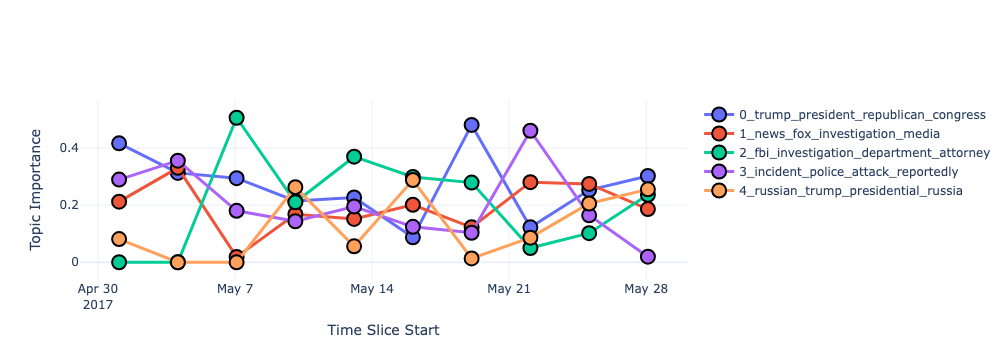

In [69]:
# plot development of topic importance over time
CNN_dynamic_plot = model.plot_topics_over_time(top_k=5)
CNN_dynamic_plot

In [70]:
# save plot as an html file
save_dir = "plots/topic_modeling/" # specify where to save it
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, "CNN_dynamic_plot.html")

dynamic_plot.write_html(save_path)

### Fox News

In [48]:
# only include CNN

# read csv
file_path = "/work/Bachelor/sample_data/dropbox/joined_dataframe/CNN_Fox_joined_17_05.csv"
CNN_Fox_joined_17_05 = pd.read_csv(file_path)

# Filter the DataFrame to include only rows where 'source' is 'CNN'
Fox_only_df = CNN_Fox_joined_17_05[CNN_Fox_joined_17_05["source"] == "Fox News"]

# removing the words coded as censored
Fox_only_df["body"] = Fox_only_df["body"].str.replace("CENSOREDfrfrfr", "", regex=False)

# make articles into lists 
corpus = Fox_only_df["body"].tolist()

# convert timestamps to datetime objects
Fox_only_df["date"] = pd.to_datetime(Fox_only_df["date"], format = "%y-%m-%d")

# make timestamps (now datetime objects) into lists
timestamps = Fox_only_df["date"].tolist()

# inspect data
#corpus

# check data type
#type(corpus)

# check length
len(corpus)


/tmp/ipykernel_6766/636612833.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_6766/636612833.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



71

In [49]:
# initiate dynamic model
model = KeyNMF(5, top_n=6, random_state=42) # top_n must be larger than the first number to run
document_topic_matrix = model.fit_transform_dynamic(
    corpus, timestamps=timestamps, bins=10
)


In [50]:
# see topics and their keywords over time 
model.print_topics_over_time()

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Time Slice       ┃ 0_trump_preside… ┃ 1_news_fox_inve… ┃ 2_fbi_investiga… ┃ 3_incident_poli… ┃ 4_russian_trump… ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ 2017 05 01 -     │ trump,           │ news, 22, fox,   │ congress, day,   │ incident,        │ security,        │
│ 2017 05 04       │ president,       │ trump, just      │ thursday,        │ police, public,  │ people,          │
│                  │ congress, media, │                  │ friday, nation   │ people, told     │ government,      │
│                  │ washington       │                  │                  │                  │ country, nation  │
├──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┤
│ 2017 05 04 -     │ republican,      │ media, fox,      │ reportedly,      │ incident,        │ incident,        │
│ 2017 05 07       │ trump,           │ news, house,     │ police, foreign, │ police,          │ foreign, years,  │
│                  │ president,       │ told             │ reported, time   │ reportedly,      │ year, left       │
│                  │ going,           │                  │                  │ time, years      │                  │
│                  │ washington       │                  │                  │                  │                  │
├──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┤
│ 2017 05 07 -     │ trump,           │ public, state,   │ fbi,             │ incident,        │ public, monday,  │
│ 2017 05 10       │ president,       │ monday, media,   │ investigation,   │ united, going,   │ media, day,      │
│                  │ adviser,         │ day              │ department,      │ said, state      │ state            │
│                  │ reportedly,      │                  │ attorney,        │                  │                  │
│                  │ foreign          │                  │ president        │                  │                  │
├──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┤
│ 2017 05 10 -     │ president,       │ news, united,    │ fbi, attorney,   │ incident,        │ russian, russia, │
│ 2017 05 13       │ officials,       │ congress,        │ presidential,    │ reportedly,      │ fox, military,   │
│                  │ trump, chief,    │ reported, trump  │ department,      │ united, reuters, │ attack           │
│                  │ attorney         │                  │ trump            │ seen             │                  │
├──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┤
│ 2017 05 13 -     │ trump,           │ family, news,    │ fbi, director,   │ incident,        │ presidential,    │
│ 2017 05 16       │ president,       │ york, police,    │ trump,           │ police, public,  │ department, fbi, │
│                  │ government,      │ investigation    │ investigation,   │ officials,       │ director,        │
│                  │ administration,  │                  │ fox              │ attorney         │ president        │
│                  │ foreign          │                  │                  │                  │                  │
├──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┤
│ 2017 05 16 -     │ reports, trump,  │ news, fox,       │ fbi,             │ incident,        │ russian, trump,  │
│ 2017 05 19       │ president,       │ family,          │ investigation,   │ attack, police,  │ russia,          │
│                  │ reportedly,      │ spokesman,       │ trump,           │ investigation,   │ security,        │
│                  │ information      │ report          

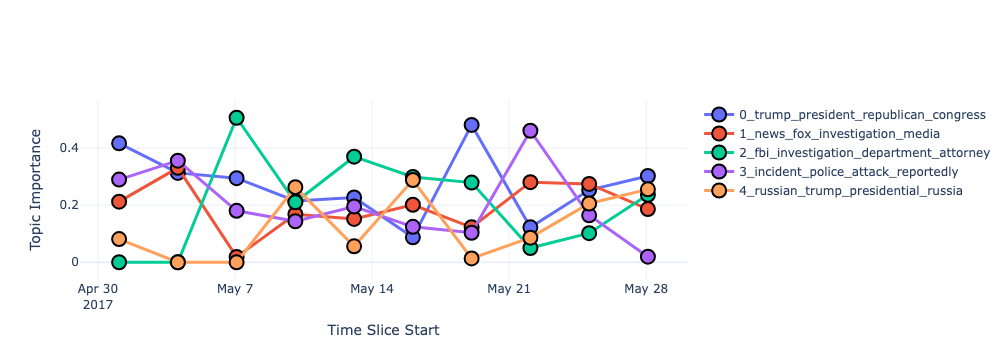

In [71]:
# plot development of topic importance over time
Fox_dynamic_plot = model.plot_topics_over_time(top_k=5)
Fox_dynamic_plot

In [72]:
# save plot as an html file
save_dir = "plots/topic_modeling/" # specify where to save it
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, "Fox_dynamic_plot.html")

dynamic_plot.write_html(save_path)